In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from DynamicLoop import DynamicLoop as dl

In [3]:
import glob
from time_of_file import time_of_file
files = glob.glob('dl_G345/datas/0.1hz/*.csv')
files.sort(key=time_of_file)

In [4]:
files

['dl_G345/datas/0.1hz\\dl_G345_1.4kn2017-8-16(10-46-19).csv',
 'dl_G345/datas/0.1hz\\dl_G345_2.8kn2017-8-16(10-48-36).csv',
 'dl_G345/datas/0.1hz\\dl_G345_3.5kn2017-8-16(10-50-42).csv',
 'dl_G345/datas/0.1hz\\dl_G345_4.2kn2017-8-16(10-52-50).csv',
 'dl_G345/datas/0.1hz\\dl_G345_4.9kn2017-8-16(10-54-59).csv',
 'dl_G345/datas/0.1hz\\dl_G345_5.6kn2017-8-16(10-57-9).csv',
 'dl_G345/datas/0.1hz\\dl_G345_6.3kn2017-8-16(10-59-8).csv',
 'dl_G345/datas/0.1hz\\dl_G345_7kn2017-8-16(11-1-9).csv',
 'dl_G345/datas/0.1hz\\dl_G345_0.7kn2017-8-16(11-3-45).csv',
 'dl_G345/datas/0.1hz\\dl_G345_2.1kn2017-8-16(11-5-46).csv',
 'dl_G345/datas/0.1hz\\dl_G345_7.7kn2017-8-16(11-8-11).csv',
 'dl_G345/datas/0.1hz\\dl_G345_8.4kn2017-8-16(11-10-24).csv']

In [6]:
df1 = pd.read_csv(files[1], encoding='gb2312')
df1

,时间,振次,轴位移,力,变形,围压,孔压,反压,sigma_d,epsilon_d,d1,pore_pressure,back_pressure
0,0.00,0.00,121.0,22.03,15.373,301.0,204.0,190.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.20,0.02,120.8,22.02,15.354,301.0,204.0,188.0,-0.141471,-0.000032,-0.000333,0.0,-2.0
2,0.40,0.04,120.8,22.00,15.360,301.0,205.0,190.0,-0.424413,-0.000022,-0.000333,1.0,0.0
3,0.61,0.06,120.8,21.86,15.374,301.0,205.0,189.0,-2.405008,0.000002,-0.000333,1.0,-1.0
4,0.81,0.08,120.9,21.88,15.353,301.0,204.0,190.0,-2.122066,-0.000033,-0.000167,0.0,0.0
5,1.01,0.10,120.9,22.08,15.362,301.0,205.0,190.0,0.707355,-0.000018,-0.000167,1.0,0.0
6,1.21,0.12,120.9,22.12,15.360,300.0,205.0,189.0,1.273240,-0.000022,-0.000167,1.0,-1.0
7,1.41,0.14,120.8,22.22,15.368,300.0,205.0,189.0,2.687950,-0.000008,-0.000333,1.0,-1.0
8,1.62,0.16,120.9,22.58,15.381,300.0,205.0,189.0,7.780908,0.000013,-0.000167,1.0,-1.0
9,1.82,0.18,120.8,22.84,15.383,301.0,204.0,190.0,11.459156,0.000017,-0.000333,0.0,0.0


In [19]:
dl1 = dl(df1['epsilon_d'][50:100], df1['sigma_d'][50:100], xscale=1, yscale=1)

In [20]:
e1 = dl1.ellipse_byfit()
e1.info()

Ellipse class
center: (1.71e-04, -9.07)
axis length: (1.19e-04, 39.80)
angle_of_rotation: 1.57)
ellipse area: 1.48e-02
ellipse area of scatters: -1.48e-02
tri area: 3.21e-03
x_max, y_max: (3.32e-04, 30.73)
xc_max, yc_max: (1.62e-04, 39.80)


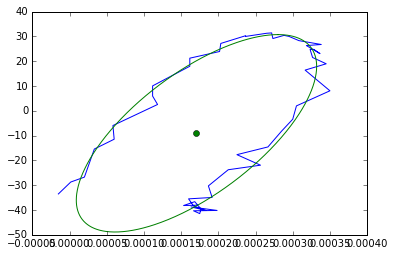

In [33]:
plt.plot(dl1.loop_x, dl1.loop_y)
plt.plot(e1.scatters()[0]/dl1.xscale, e1.scatters()[1]/dl1.yscale)
plt.plot(e1.center[0], e1.center[1],'go')

In [22]:
dl1.modulus(), dl1.modulus_byfit()

(89733.072676572978, 246403.49166758047)

In [23]:
dl1.damping_ratio(), dl1.damping_ratio_byfit()

(0.30594269266286694, 0.3675482777047604)

In [25]:
dl1.sigma_m(),dl1.epsilon_m()

(31.406575436800665, 0.00035000000000000135)

In [26]:
dl1.sigma_m_byfit(), dl1.epsilon_m_byfit()

(39.802049042402025, 0.00016153200091863316)

In [27]:
e1.center

array([  1.70623359e-04,  -9.07135484e+00])

In [34]:
np.array([dl1.epsilon_m(),dl1.sigma_m()]) - e1.center

array([  1.79376641e-04,   4.04779303e+01])

In [35]:
40.4779/1.7937664e-4

225658.70338523455